Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [ ]:
df=pd.read_csv(r"/content/Wildfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
def day(row):
    if row=="mon":
        return 1
    elif row=='tue':
        return 2
    elif row=='wed':
        return 3
    elif row=='thu':
        return 4
    elif row=='fri':
        return 5
    elif row=='sat':
        return 6
    else:
        return 7

df["day"]=df["day"].apply(lambda x:day(x))
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
def month(row):
    if row=="jan":
        return 1
    elif row=='feb':
        return 2
    elif row=='mar':
        return 3
    elif row=='apr':
        return 4
    elif row=='may':
        return 5
    elif row=='jun':
        return 6
    elif row=='jul':
        return 7
    elif row=='aug':
        return 8
    elif row=='sep':
        return 9
    elif row=='oct':
        return 10
    elif row=='nov':
        return 11
    else:
        return 12

df["month"]=df["month"].apply(lambda x:month(x))
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
def fire(row):
    if row>0:
        return 1
    else:
        return 0

df["fire"]=df["area"].apply(lambda x:fire(x))
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


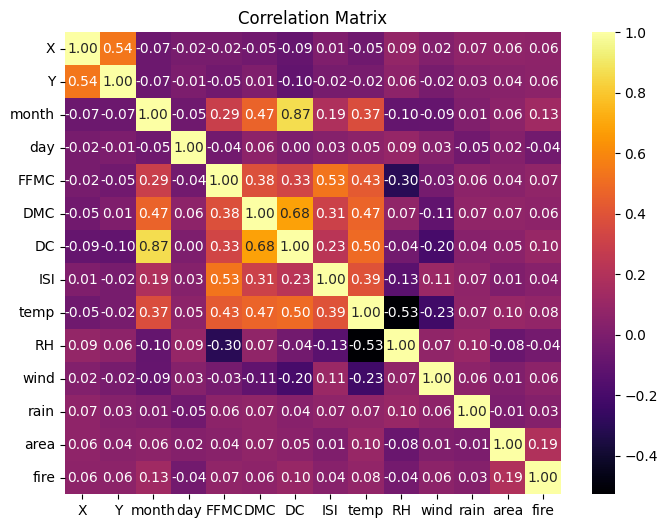

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr=df.corr()
corr

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,0.062491
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,0.056892
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496,0.130329
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226,-0.042970
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.073823
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.062672
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.096724
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.035663
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.076047
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.035587


Regresssion

In [ ]:
corr["area"]

X        0.063385
Y        0.044873
month    0.056496
day      0.023226
FFMC     0.040122
DMC      0.072994
DC       0.049383
ISI      0.008258
temp     0.097844
RH      -0.075519
wind     0.012317
rain    -0.007366
area     1.000000
fire     0.193224
Name: area, dtype: float64

Classification

In [ ]:
corr["fire"]

X        0.062491
Y        0.056892
month    0.130329
day     -0.042970
FFMC     0.073823
DMC      0.062672
DC       0.096724
ISI      0.035663
temp     0.076047
RH      -0.035587
wind     0.055702
rain     0.025550
area     0.193224
fire     1.000000
Name: fire, dtype: float64

From the Correlation matrix, we can infer that the features ISI and rain have minimum effect on the forest area affected by wildfire. But, they can't be ignored because they are significant factors for determining if the fire will occur or not in the first place.


---

So, all columns will be taken as features except fire and area, which are the class label and the output values, respectively.

In [ ]:
X=df[["X","Y","month","day","FFMC","DMC","temp","RH","wind"]]
y_class=df["fire"]
y_reg=df["area"]

# ***2. ML Model 1***

## KNN

In [ ]:

class KNNClassifierRegressor:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_class_train = None
        self.y_reg_train = None

    def distance(self, p1, p2):
        return np.linalg.norm(p1[:-2] - p2[:-2])

    def sort(self, l, p):
        swapped = False
        for n in range(len(l)-1, 0, -1):
            for i in range(n):
                if self.distance(l[i], p) > self.distance(l[i + 1], p):
                    swapped = True
                    l[i], l[i + 1] = l[i + 1], l[i]
            if not swapped:
                return

    def fit(self, X_train, y_class_train, y_reg_train):
        self.X_train = X_train
        self.y_class_train = y_class_train
        self.y_reg_train = y_reg_train

    def predict(self, X_test):
        pred_val = []
        pred_class = []

        for j in range(len(X_test)):
            k_neighbours = []
            p = X_test.iloc[j].values

            for i in range(len(self.X_train)):
                p1 = self.X_train.iloc[i].values
                if len(k_neighbours) == self.k:
                    if self.distance(p, p1) < self.distance(p, k_neighbours[self.k - 1]):
                        k_neighbours[self.k - 1] = p1
                else:
                    k_neighbours.append(p1)
                self.sort(k_neighbours, p)

            pred_val.append(np.mean([i[-2] for i in k_neighbours]))
            pred_class.append(1 if np.count_nonzero([i[-1] for i in k_neighbours]) >= np.ceil(self.k / 2) else 0)

        return np.array(pred_class), np.array(pred_val)

    def reg_loss(self, y, y_pred):
        return (np.mean((y - y_pred)**2))

    def class_acc(self, y, y_pred):
        correct = np.sum(y == y_pred)
        return correct / len(y)

    def train(self,X,y_class,y_reg):
        start_time = time.time()

        X_train=X[:400]
        X_test=X[400:]
        y_class_train=y_class[:400]
        y_class_test=y_class[400:]
        y_reg_train=y_reg[:400]
        y_reg_test=y_reg[400:]

        self.fit(X_train,y_class_train,y_reg_train)

        pred_class,pred_val=self.predict(X_test)

        training_time = time.time() - start_time


        return self.class_acc(y_class_test,pred_class),self.reg_loss(y_reg_test,pred_val), training_time




In [ ]:
model=KNNClassifierRegressor(6)
acc,loss, time_taken =model.train(X,y_class,y_reg)
print(loss)
print(acc)
print(time_taken/600)

6691.726025735993
0.5811965811965812
0.01893469293912252


# ***3. ML Model 2***

#LDA


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


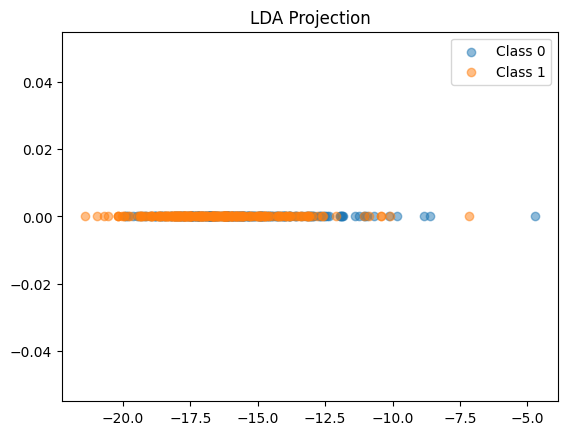

In [ ]:
class LinearDiscriminantAnalysis:
    def __init__(self, n_components=1):
      self.n_components = n_components
      self.w = None  # Weight vector
      self.mean_class_1 = None
      self.mean_class_2 = None

    def fit(self, X, y):
        # Separate data into two classes
        class_1 = X[y == 0]
        class_2 = X[y == 1]

        # Calculate class means
        self.mean_class_1 = np.mean(class_1, axis=0)
        self.mean_class_2 = np.mean(class_2, axis=0)

        # Calculate within-class scatter matrix
        Sw = np.dot((class_1 - self.mean_class_1).T, (class_1 - self.mean_class_1))
        Sw += np.dot((class_2 - self.mean_class_2).T, (class_2 - self.mean_class_2))

        # Calculate between-class scatter matrix
        Sb = np.outer((self.mean_class_2 - self.mean_class_1), (self.mean_class_2 - self.mean_class_1))

        # Solve the eigenvalue problem for inv(Sw)*Sb
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

        # Sort eigenvectors by decreasing eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.w = eigenvectors[:, sorted_indices[:self.n_components]]

    def transform(self, X):
        # Project the data onto the subspace spanned by the top eigenvectors
        return np.dot(X, self.w)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y_class)
X_lda = lda.transform(X)


# Separate data for each class
X_lda_class_0 = X_lda[y_class == 0]
X_lda_class_1 = X_lda[y_class == 1]

# Plot each class separately
plt.scatter(X_lda_class_0, np.zeros(X_lda_class_0.shape[0]), label='Class 0', alpha=0.5)
plt.scatter(X_lda_class_1, np.zeros(X_lda_class_1.shape[0]), label='Class 1', alpha=0.5)
plt.legend()
plt.title('LDA Projection')
plt.show()




In [ ]:

class LinearDiscriminantAnalysis:
    def __init__(self, n_components=1):
        self.n_components = n_components
        self.w = None  # Weight vector
        self.mean_class_1 = None
        self.mean_class_2 = None
        self.training_time = None

    def fit(self, X, y):
        start_time = time.time()

        # Separate data into two classes
        class_1 = X[y == 0]
        class_2 = X[y == 1]

        # Calculate class means
        self.mean_class_1 = np.mean(class_1, axis=0)
        self.mean_class_2 = np.mean(class_2, axis=0)

        # Calculate within-class scatter matrix
        Sw = np.dot((class_1 - self.mean_class_1).T, (class_1 - self.mean_class_1))
        Sw += np.dot((class_2 - self.mean_class_2).T, (class_2 - self.mean_class_2))

        # Calculate between-class scatter matrix
        Sb = np.outer((self.mean_class_2 - self.mean_class_1), (self.mean_class_2 - self.mean_class_1))

        # Solve the eigenvalue problem for inv(Sw)*Sb
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

        # Sort eigenvectors by decreasing eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.w = eigenvectors[:, sorted_indices[:self.n_components]]

        self.training_time = time.time() - start_time

    def transform(self, X):
        # Project the data onto the subspace spanned by the top eigenvectors
        return np.dot(X, self.w)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)

    def predict(self, X):
        # Project the input data onto the subspace
        X_lda = self.transform(X)
        # Assign class labels based on the projection
        predictions = np.where(X_lda >= 1, 0, 1)
        return predictions

# Split the data into training and testing sets
split_index = 400

X_train, y_train = X.iloc[:split_index], y_class.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y_class.iloc[split_index:]

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)
start_time = time.time()
lda.fit(X_train.values, y_train.values)
training_time = time.time() - start_time
print("Training time:", training_time)

# Predict classes for the test set
y_pred = lda.predict(X_test.values)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test.values)
print("Accuracy:", accuracy)


Training time: 0.0011491775512695312
Accuracy: 0.5811965811965812


# ***4. ML Model 3***
# Random Forest

In [ ]:
# Increase recursion limit
sys.setrecursionlimit(10000)


class Node:
    def __init__(self, feature_index=None, threshold=None, value=None, left=None, right=None, is_leaf=False):
        self.feature_index = feature_index
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right
        self.is_leaf = is_leaf

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def gini_index(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y))**2)

    def find_best_split(self, X, y):
        n_features = X.shape[1]
        best_criterion = np.inf
        best_feature = None
        best_threshold = None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if len(np.unique(y[left_mask])) > 1 and len(np.unique(y[right_mask])) > 1:
                    left_criterion = self.mean_squared_error(y[left_mask])
                    right_criterion = self.mean_squared_error(y[right_mask])
                    criterion = left_criterion + right_criterion
                else:
                    left_criterion = self.gini_index(y[left_mask])
                    right_criterion = self.gini_index(y[right_mask])
                    p_left = len(y[left_mask]) / len(y)
                    p_right = len(y[right_mask]) / len(y)
                    criterion = p_left * left_criterion + p_right * right_criterion

                if criterion < best_criterion:
                    best_criterion = criterion
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y):
        stack = [(X, y, 0, self.max_depth, None)]
        root = None

        while stack:
            X_current, y_current, depth, remaining_depth, parent = stack.pop()

            if depth == 0 or len(np.unique(y_current)) == 1:
                node = Node(value=np.mean(y_current), is_leaf=True)
            else:
                feature, threshold = self.find_best_split(X_current, y_current)

                if feature is None or remaining_depth == 0:
                    node = Node(value=np.mean(y_current), is_leaf=True)
                else:
                    left_mask = X_current[:, feature] <= threshold
                    right_mask = ~left_mask

                    stack.append((X_current[right_mask], y_current[right_mask], depth + 1, remaining_depth - 1, None))
                    stack.append((X_current[left_mask], y_current[left_mask], depth + 1, remaining_depth - 1, None))

                    node = Node(feature, threshold, left=None, right=None, is_leaf=False)

            if parent is not None:
                if parent.left is None:
                    parent.left = node
                else:
                    parent.right = node
            else:
                root = node

        return root

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)


    def predict_instance(self, x):
        node = self.tree
        while not node.is_leaf:
            if x[node.feature_index] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def predict(self, X):
        return [self.predict_instance(x, self.tree) for x in X]


class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []
        self.training_time = None

    def fit(self, X, y, num_splits=10):
        start_time = time.time()

        X_train = X[:400].values
        X_test = X[400:].values
        y_train = y[:400].values
        y_test = y[400:].values

        if np.unique(y).size == 2:
            accuracy_threshold = 0.45
            current_accuracy = 0.0
            while current_accuracy <= accuracy_threshold:
                self.estimators = []  # Clear previous estimators

                for _ in range(self.n_estimators):
                    # Randomly select samples with replacement
                    indices = np.random.choice(len(X_train), len(X_train), replace=True)
                    X_subset, y_subset = X_train[indices], y_train[indices]

                    # Build a decision tree on the subset and evaluate on validation data
                    tree = DecisionTree(max_depth=self.max_depth)
                    tree.fit(X_subset, y_subset)
                    self.estimators.append(tree)

                # Evaluate the current accuracy on the validation data
                predictions = [np.argmax(self.predict_instance(x)) for x in X_test]
                current_accuracy = np.sum(predictions == y_test) / len(y_test)

            self.evaluate_classification(X_test, y_test)
        else:
            regression_loss_threshold = 6000.0
            current_regression_loss = float('inf')

            while current_regression_loss > regression_loss_threshold:
                self.estimators = []  # Clear previous estimators

                for _ in range(self.n_estimators):
                    # Randomly select samples with replacement
                    indices = np.random.choice(len(X_train), len(X_train), replace=True)
                    X_subset, y_subset = X_train[indices], y_train[indices]

                    # Build a decision tree on the subset and evaluate on validation data
                    tree = DecisionTree(max_depth=self.max_depth)
                    tree.fit(X_subset, y_subset)
                    self.estimators.append(tree)

                # Evaluate the current regression loss on the validation data
                predictions = self.predict(X_test)
                current_regression_loss = np.mean((predictions - y_test) ** 2)

            self.evaluate_regression(X_test, y_test)

        self.training_time = time.time() - start_time
        print("Training Time:", self.training_time)



    def predict_instance(self, x):
        predictions = [tree.predict_instance(x) for tree in self.estimators]
        return predictions

    def predict(self, X):
        return [np.mean(self.predict_instance(x)) for x in X]

    def evaluate_classification(self, X, y):
        predictions = [np.argmax(self.predict_instance(x)) for x in X]
        accuracy = np.sum(predictions == y) / len(y)
        print("Classification Accuracy:", accuracy)

    def evaluate_regression(self, X, y):
        predictions = self.predict(X)
        cost = np.mean((predictions - y)**2)
        print("Regression Cost:", cost)


In [ ]:
forest_classifier = RandomForest(n_estimators=10, max_depth=5)
forest_classifier.fit(X, y_class)


forest_regressor = RandomForest(n_estimators=6, max_depth=3)
forest_regressor.fit(X, y_reg)

Classification Accuracy: 0.5811965811965812
Training Time: 0.18604230880737305
Regression Cost: 5717.4611915722935
Training Time: 0.014033079147338867


# ***5. ML Model 4 (Based on research literature)***
# MLP

In [ ]:

class MLP:
    def __init__(self, in_size, hidden_size, out_size, activation='relu', task='regression', dropout_prob=None):
        self.in_size = in_size
        self.hidden_size = hidden_size
        self.out_size = out_size
        self.activation_name = activation
        self.task = task  # 'regression' or 'classification'
        self.dropout_prob = dropout_prob
        self.training_time = None  #

        # Use Xavier/Glorot initialization for weights
        self.w1 = np.random.randn(in_size, hidden_size) * np.sqrt(2 / (in_size + hidden_size))
        self.w2 = np.random.randn(hidden_size, out_size) * np.sqrt(2 / (hidden_size + out_size))

    def activation(self, X):
        if self.activation_name == 'relu':
            return np.maximum(0, X)
        elif self.activation_name == 'tanh':
            return np.tanh(X)
        elif self.activation_name == 'sigmoid':
            return 1 / (1 + np.exp(-X))
        elif self.activation_name == 'linear':
            return X
        else:
            raise ValueError("Invalid activation function")

    def del_activation(self, X):
        if self.activation_name == 'relu':
            return np.where(X > 0, 1, 0)
        elif self.activation_name == 'tanh':
            return 1 - np.tanh(X)**2
        elif self.activation_name == 'sigmoid':
            sigmoid_X = 1 / (1 + np.exp(-X))
            return sigmoid_X * (1 - sigmoid_X)
        elif self.activation_name == 'linear':
            return np.ones_like(X)
        else:
            raise ValueError("Invalid activation function")

    def dropout(self, X, p):
        if self.dropout_prob is not None:
            mask = (np.random.rand(*X.shape) < p) / (1 - p)
            return X * mask
        else:
            return X

    def fwd_prop(self, X, training=True):
        self.a0 = X @ self.w1
        self.h1 = self.activation(self.a0)
        self.h1 = self.dropout(self.h1, self.dropout_prob) if training else self.h1
        self.a1 = self.h1 @ self.w2
        self.out = self.activation(self.a1) if self.task == 'classification' else self.a1
        return self.out

    def back_prop(self, X, y, lr):
        out_error = y.reshape(-1, 1) - self.out  # Ensure y is a column vector
        output_delta = out_error * self.del_activation(self.a1)

        hidden_error = output_delta.dot(self.w2.T)
        hidden_delta = hidden_error * self.del_activation(self.a0)

        self.w2 += self.h1.T.dot(output_delta) * lr
        self.w1 += X.T.dot(hidden_delta) * lr

    def train(self, X, y, epochs, lr):
        start_time = time.time()  # Track start time
        X_train=X[:400]
        X_test=X[400:]
        y_train=y[:400]
        y_test=y[400:]

        for i in range(epochs):
            out = self.fwd_prop(X_train)
            self.back_prop(X_train, y_train, lr)

            if i % 100 == 0:
                if self.task == "classification":
                    predictions = np.round(out)
                    accuracy = np.mean(predictions == y_train)
                    print("Accuracy in Epoch", i, ":", accuracy)
                else:
                    cost = np.mean((y_train - out)**2)
                    print("Cost in Epoch", i, ":", cost)

        self.training_time = time.time() - start_time

        if self.task == "classification":
            class_predictions = class_model.predict(X_test)
            class_predictions_rounded = np.round(class_predictions)
            class_accuracy_test = np.mean(class_predictions_rounded == y_test)
            print("Classification Test Accuracy:", class_accuracy_test)
        else:
            reg_predictions = reg_model.predict(X_test)
            y_test_reshaped = y_test.reshape(-1, 1)
            reg_mse_test = np.mean((y_test_reshaped - reg_predictions)**2)
            print("Regression Test Mean Squared Error:", reg_mse_test)


    def predict(self, X_test):
        # Forward propagation without updating weights
        a0 = X_test @ self.w1
        h1 = self.activation(a0)
        a1 = h1 @ self.w2
        out = self.activation(a1) if self.task == 'classification' else a1
        return out


In [ ]:
class_model = MLP(9, 4, 1, activation='sigmoid', task='classification', dropout_prob=0.2)
class_model.train(X.values, y_class.values, epochs=370, lr=0.01)
print("Training Time:", class_model.training_time)


Accuracy in Epoch 0 : 0.49695
Accuracy in Epoch 100 : 0.497475
Accuracy in Epoch 200 : 0.49725
Accuracy in Epoch 300 : 0.496975
Classification Test Accuracy: 0.5770326539557309
Training Time: 0.19288992881774902


In [ ]:
reg_model = MLP(9, 4, 1,activation='tanh')
reg_model.train(X.values, y_reg.values, epochs=500, lr=0.01)
print("Training Time:", class_model.training_time)

Cost in Epoch 0 : 3726.609414424564
Cost in Epoch 100 : 3603.5227131248744
Cost in Epoch 200 : 3603.684931648834
Cost in Epoch 300 : 3603.834785501888
Cost in Epoch 400 : 3603.9740170193104
Regression Test Mean Squared Error: 5611.643308031199
Training Time: 0.19288992881774902


# ***6. Comparison of insights drawn from the models***

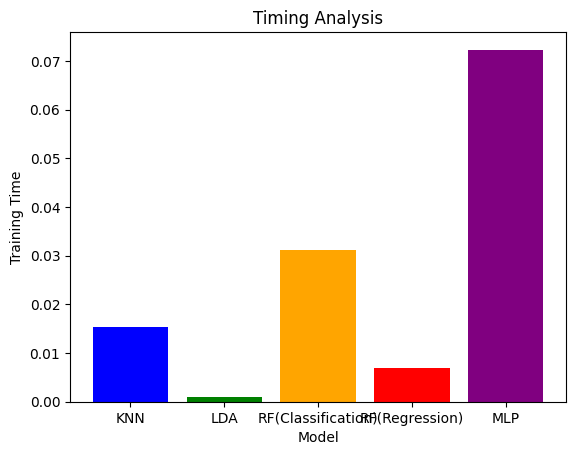

In [ ]:
categories = ['KNN', 'LDA', 'RF(Classification)', 'RF(Regression)', 'MLP']
values = [0.015349347591400148, 0.0010538101196289062, 0.031059741973876953,0.007014274597167969, 0.07229018211364746]


# Create a bar graph
plt.bar(categories, values, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Training Time')
plt.title('Timing Analysis')

# Display the graph
plt.show()

*Model Complexity:*
---
LDA: Low complexity, assumes linear decision boundaries.\
k-NN: Low training complexity, but can have high prediction complexity for large datasets.\
Random Forest: Moderate to high complexity, especially with a large number of trees and deep trees.\
MLP: High complexity, especially with deep architectures.

---

*Prediction Time:*
---
LDA: Fast prediction, involves linear algebraic operations.\
k-NN: Can be slow, especially for large datasets or high-dimensional spaces.\
Random Forest: Fast prediction due to ensemble averaging or voting.\
MLP: Fast prediction once trained, but can be slower than simpler models.

# **_7. References_**

1.   https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
2.   https://youtu.be/9IDXYHhAfGA?si=MagYXfFLillQsW8H
3.   https://www.sebastian-mantey.com/
4.   https://www.assemblyai.com/?utm_source=youtube&utm_medium=referral&utm_campaign=scratch04

